# Quick Introduction to Machine Learning

Not that machine learning is a broad field; neural networks are only a subset, and deep learning is an even smaller subset of approaches.  Many standard non-neural-net approaches are available within Scikit-learn (aka sklearn).

## Install sklearn

In [1]:
!pip install scikit-learn

## Load our Iris dataset from the pandas exploration

In [2]:
import pandas as pd

# Load a CSV file from a URL, display head rows
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Preprocess into train-test and feature-label sets

In [3]:
from sklearn.model_selection import train_test_split

# Extract our feature columns from the dataframe
# (in this case, everything but the classification label)
X = df.drop('species', axis=1)

# Extract our classification labels from our dataframe
y = df['species']

# Leverage some sklearn utils to split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100, 4) (100,)
(50, 4) (50,)


### Decision tree

In [4]:
# Pull in one of the most popular quick ML learners - a decision tree!
from sklearn.tree import DecisionTreeClassifier

# Create new classifier with mostly defaults
clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Test the model's accuracy (0.0 being never correct, 1.0 means always correct)
print('Test accuracy:', clf.score(X_test, y_test))

Test accuracy: 0.98


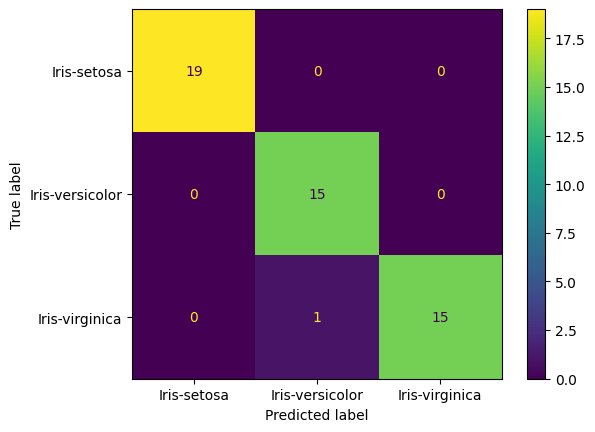

In [5]:
# Let's see where it gets confused using a - confusion matrix!
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

### Random forest (ensemble learner composed of many weak decision trees)

Test accuracy: 0.98


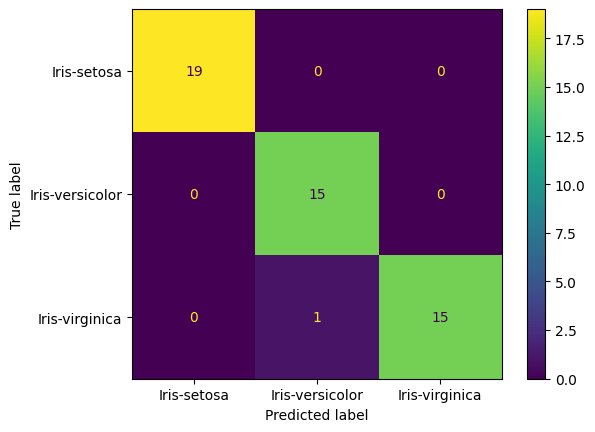

In [6]:
# The API is very consistent - fit, score, predict
from sklearn.ensemble import RandomForestClassifier

# Create new classifier with mostly defaults
clf = RandomForestClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Test the model's accuracy (0.0 being never correct, 1.0 means always correct)
print('Test accuracy:', clf.score(X_test, y_test))

# Plot confusion matrix
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

### Simple neural network

/Users/rbates/src/adc2022/ENV/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Test accuracy: 0.76


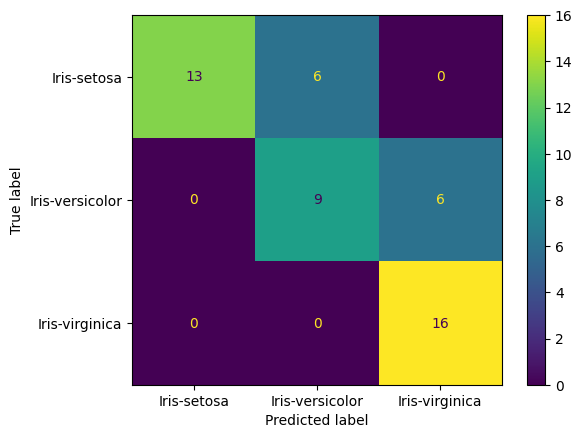

In [7]:
# Even simple neural nets can be used
from sklearn.neural_network import MLPClassifier

# Create new classifier with mostly defaults
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=100, random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Test the model's accuracy (0.0 being never correct, 1.0 means always correct)
print('Test accuracy:', clf.score(X_test, y_test))

# Plot confusion matrix
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()